# Modeling

## Load libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression, SelectFromModel

## Load data

In [6]:
modeling_data = pd.read_csv('../data/modeling/modeling_data.csv')

In [7]:
modeling_data.head()

,id,name,host_id,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,...,property_type,host_acceptance_rate,maximum_nights,listing_url,region,distance_to_cristo_redentor,distance_to_pan_de_azucar,distance_to_copacabana_beach,distance_to_ipanema_beach,distance_to_botanical_garden
0,2979359,"Quarto em Botafogo perto da praia, show da Mad...",12459092,-22.954477,-43.182747,2,51.00,2,1,2018-02-13,...,37,99,1125,https://www.airbnb.com/rooms/2979359,130,2.856086,2.885337,1.849209,3.957720,4.968440
1,48931984,LOVELY 4BR WITH AMAZING OCEAN VIEW IN COPACABANA,235496,-22.965960,-43.175550,0,164.05,2,106,2024-06-09,...,16,98,30,https://www.airbnb.com/rooms/48931984,32,3.905034,2.832851,0.888922,3.572558,5.495067
2,1162632127795605756,"Copacabana, Av Atlântica - AC + Laundry + Wi-Fi",10406037,-22.972470,-43.184710,0,20.23,1,1,2024-06-11,...,16,98,89,https://www.airbnb.com/rooms/1162632127795605756,93,3.493401,4.013975,0.298728,2.391609,4.589571
3,11691696,Hostel Copacabana Pacotes Trilhas,16613801,-22.967260,-43.189280,2,22.95,2,4,2024-05-06,...,41,99,1125,https://www.airbnb.com/rooms/11691696,51,2.763596,4.050868,0.841259,2.418955,4.087054
4,493569,Quarto familiar em Copacabana,2438532,-22.965150,-43.189100,2,23.12,2,138,2024-06-03,...,41,99,10,https://www.airbnb.com/rooms/493569,41,2.640371,3.919596,0.967863,2.613891,4.113101


In [8]:
modeling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20964 entries, 0 to 20963
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            20964 non-null  int64  
 1   name                          20964 non-null  object 
 2   host_id                       20964 non-null  int64  
 3   latitude                      20964 non-null  float64
 4   longitude                     20964 non-null  float64
 5   room_type                     20964 non-null  int64  
 6   price                         20964 non-null  float64
 7   minimum_nights                20964 non-null  int64  
 8   number_of_reviews             20964 non-null  int64  
 9   last_review                   20964 non-null  object 
 10  availability_365              20964 non-null  int64  
 11  number_of_reviews_ltm         20964 non-null  int64  
 12  neighbourhood_cleansed        20964 non-null  int64  
 13  h

Dropping the object columns that are not useful for the model.

In [9]:
modeling_data_df = modeling_data.copy()
modeling_data_df = modeling_data_df = modeling_data_df.drop(columns=modeling_data_df.select_dtypes(include='object').columns)
modeling_data_df.head()

,id,host_id,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365,number_of_reviews_ltm,...,review_scores_value,property_type,host_acceptance_rate,maximum_nights,region,distance_to_cristo_redentor,distance_to_pan_de_azucar,distance_to_copacabana_beach,distance_to_ipanema_beach,distance_to_botanical_garden
0,2979359,12459092,-22.954477,-43.182747,2,51.00,2,1,364,0,...,5.00,37,99,1125,130,2.856086,2.885337,1.849209,3.957720,4.968440
1,48931984,235496,-22.965960,-43.175550,0,164.05,2,106,256,42,...,4.75,16,98,30,32,3.905034,2.832851,0.888922,3.572558,5.495067
2,1162632127795605756,10406037,-22.972470,-43.184710,0,20.23,1,1,18,1,...,5.00,16,98,89,93,3.493401,4.013975,0.298728,2.391609,4.589571
3,11691696,16613801,-22.967260,-43.189280,2,22.95,2,4,365,1,...,4.75,41,99,1125,51,2.763596,4.050868,0.841259,2.418955,4.087054
4,493569,2438532,-22.965150,-43.189100,2,23.12,2,138,347,12,...,4.80,41,99,10,41,2.640371,3.919596,0.967863,2.613891,4.113101


## Split the data

In [10]:
X = modeling_data_df.drop(columns=['price'])
y = modeling_data_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scale the data

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
joblib.dump(scaler, '../models/notebooks/scaler.pkl')

['../models/notebooks/scaler.pkl']

## General models

### 1. Random forest

In [12]:
model_rf = RandomForestRegressor(random_state=42)

In [13]:
model_rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [14]:
mae = mean_absolute_error(y_test, model_rf.predict(X_test_scaled))
mse = mean_squared_error(y_test, model_rf.predict(X_test_scaled))
r2 = r2_score(y_test, model_rf.predict(X_test_scaled))
rmse = root_mean_squared_error(y_test, model_rf.predict(X_test_scaled))

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')
print(f'RMSE: {rmse}')

MAE: 21.699486852206455
MSE: 888.5054683996179
R2: 0.5451337384357373
RMSE: 29.807808849353854


### 2. Gradient boosting classifier

In [15]:
model_gbc = GradientBoostingRegressor(random_state=42)

In [16]:
model_gbc.fit(X_train_scaled, y_train)

GradientBoostingRegressor(random_state=42)

In [17]:
mae = mean_absolute_error(y_test, model_gbc.predict(X_test_scaled))
mse = mean_squared_error(y_test, model_gbc.predict(X_test_scaled))
r2 = r2_score(y_test, model_gbc.predict(X_test_scaled))
rmse = root_mean_squared_error(y_test, model_gbc.predict(X_test_scaled))

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')
print(f'RMSE: {rmse}')

MAE: 22.057237204098147
MSE: 919.2205204170231
R2: 0.5294093097385522
RMSE: 30.318649712957587


### 3. XGBoost

In [18]:
model_xgb = xgb.XGBRegressor(random_state=42)

In [19]:
model_xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [20]:
mae = mean_absolute_error(y_test, model_xgb.predict(X_test_scaled))
mse = mean_squared_error(y_test, model_xgb.predict(X_test_scaled))
r2 = r2_score(y_test, model_xgb.predict(X_test_scaled))
rmse = root_mean_squared_error(y_test, model_xgb.predict(X_test_scaled))

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')
print(f'RMSE: {rmse}')

MAE: 20.87187120241476
MSE: 847.5889093510237
R2: 0.5660807814337177
RMSE: 29.113380246048788


### 4. KNNeighbors

In [21]:
model_knn = KNeighborsRegressor()

In [22]:
model_knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [23]:
mae = mean_absolute_error(y_test, model_knn.predict(X_test_scaled))
mse = mean_squared_error(y_test, model_knn.predict(X_test_scaled))
r2 = r2_score(y_test, model_knn.predict(X_test_scaled))
rmse = root_mean_squared_error(y_test, model_knn.predict(X_test_scaled))

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')
print(f'RMSE: {rmse}')

MAE: 25.7573088900558
MSE: 1266.6890261491733
R2: 0.35152441669632073
RMSE: 35.590574962329185


### 5. Support vector machine

In [24]:
model_svr = SVR()

In [25]:
model_svr.fit(X_train_scaled, y_train)

SVR()

In [26]:
mae = mean_absolute_error(y_test, model_svr.predict(X_test_scaled))
mse = mean_squared_error(y_test, model_svr.predict(X_test_scaled))
r2 = r2_score(y_test, model_svr.predict(X_test_scaled))
rmse = root_mean_squared_error(y_test, model_svr.predict(X_test_scaled))

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')
print(f'RMSE: {rmse}')

MAE: 24.263971971664148
MSE: 1240.6826825399924
R2: 0.3648382439210096
RMSE: 35.22332583019372


I decided to use Random Forest and Gradient Boosting Classifier for the final model because they are the ones that have the best performance.

In [27]:
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror'),
    'KNeighbors': KNeighborsRegressor(),
    'SVR': SVR()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: RMSE = {rmse}')
    print(f'{name}: R2 = {r2}')


Random Forest: RMSE = 29.867378224725343
Random Forest: R2 = 0.5433138680589951
Gradient Boosting: RMSE = 30.317781199544086
Gradient Boosting: R2 = 0.5294362706010296
XGBoost: RMSE = 29.113380246048788
XGBoost: R2 = 0.5660807814337177
KNeighbors: RMSE = 35.590574962329185
KNeighbors: R2 = 0.35152441669632073
SVR: RMSE = 35.22332583019372
SVR: R2 = 0.3648382439210096


## Hyperparameter tuning: Random Forest and Gradient Boosting Classifier

### 1. Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_scaled, y_train)

print("Best Hyperparameters:", random_search.best_params_)

best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE) on Test Set: {mse}')
print(f'Root Mean Squared Error (RMSE) on Test Set: {rmse}')
print(f'R2 Score on Test Set: {r2}')


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Hyperparameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}
Mean Squared Error (MSE) on Test Set: 855.254084547912
Root Mean Squared Error (RMSE) on Test Set: 29.24472746578282
R2 Score on Test Set: 0.5621566304745527


In [37]:
best_params_rf = best_rf.get_params()

In [29]:
joblib.dump(best_rf, '../models/notebooks/best_rf_model.pkl')

['../models/notebooks/best_rf_model.pkl']

### 2. XGBoost

In [30]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

xgb_model = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')

param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'min_child_weight': [1, 2, 3, 4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1]
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=100,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

X_train_scaled = np.nan_to_num(X_train_scaled)
y_train = np.nan_to_num(y_train)

random_search.fit(X_train_scaled, y_train)

print("Best Hyperparameters:", random_search.best_params_)

best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE) on Test Set: {mse}')
print(f'Root Mean Squared Error (RMSE) on Test Set: {rmse}')
print(f'R2 Score on Test Set: {r2}')


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Hyperparameters: {'subsample': 0.7, 'reg_lambda': 0.1, 'reg_alpha': 0, 'n_estimators': 1000, 'min_child_weight': 2, 'max_depth': 8, 'learning_rate': 0.01, 'colsample_bytree': 0.9}
Mean Squared Error (MSE) on Test Set: 782.4688124954017
Root Mean Squared Error (RMSE) on Test Set: 27.97264400258584
R2 Score on Test Set: 0.5994187135713476


In [38]:
best_params_xgb = best_xgb.get_params()

In [31]:
joblib.dump(best_xgb, '../models/notebooks/best_xgb_model.pkl')

['../models/notebooks/best_xgb_model.pkl']

## Selecting important features

### Using feature importance from Random Forest

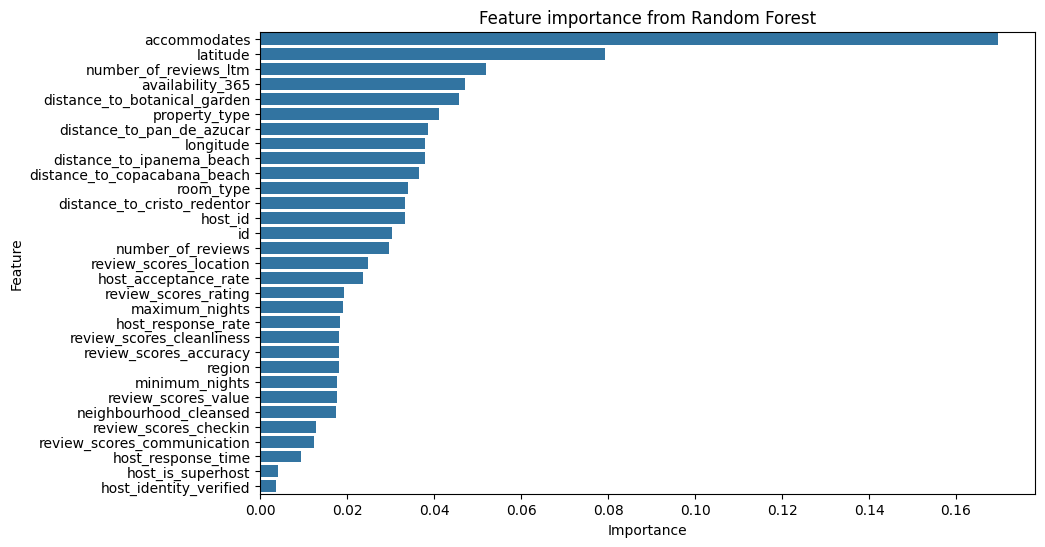

In [34]:
importances = best_rf.feature_importances_

features = X_train.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance': importances})

importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature importance from Random Forest')
plt.show()


In [40]:
X_train.shape

(16771, 31)

In [42]:
# selectin the top 10 features
top_10_features = importances_df['Feature'][:10]
# selecting the top 10 features from the training and testing data
X_train_top_10 = X_train[top_10_features]
X_test_top_10 = X_test[top_10_features]
# creating dataframes with the top 10 features
X_train_top_10 = pd.DataFrame(X_train_top_10, columns=top_10_features)
X_test_top_10 = pd.DataFrame(X_test_top_10, columns=top_10_features)

In [45]:
# making a pipeline to scale the data and fit the model
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', best_rf)
])

In [46]:
pipe.fit(X_train_top_10, y_train)

y_pred = pipe.predict(X_test_top_10)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE) on Test Set: {mse}')
print(f'Root Mean Squared Error (RMSE) on Test Set: {rmse}')
print(f'R2 Score on Test Set: {r2}')
print(f'Mean Absolute Error (MAE) on Test Set: {mae}')

Mean Squared Error (MSE) on Test Set: 1007.5408018267614
Root Mean Squared Error (RMSE) on Test Set: 31.741783217499947
R2 Score on Test Set: 0.4841941505144757
Mean Absolute Error (MAE) on Test Set: 22.49446283186826


In [83]:
### Another approach
pipe = Pipeline([
    ('feature_selection', SelectFromModel(best_rf)),
    ('model', best_rf)
])

pipe.fit(X_train_scaled, y_train)

y_pred = pipe.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE) on Test Set: {mse}')
print(f'Root Mean Squared Error (RMSE) on Test Set: {rmse}')
print(f'R2 Score on Test Set: {r2}')
print(f'Mean Absolute Error (MAE) on Test Set: {mae}')

Mean Squared Error (MSE) on Test Set: 946.1613029657594
Root Mean Squared Error (RMSE) on Test Set: 30.759735092581007
R2 Score on Test Set: 0.5156171008243715
Mean Absolute Error (MAE) on Test Set: 21.99026032031526


In [86]:
selected_mask = pipe.named_steps['feature_selection'].get_support()


In [89]:
selected_mask

array([False,  True,  True,  True,  True, False, False,  True,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
        True,  True,  True,  True])

In [91]:
selected_features = X_train.columns[selected_mask]

print("Selected Features:", selected_features)


Selected Features: Index(['host_id', 'latitude', 'longitude', 'room_type', 'availability_365',
       'number_of_reviews_ltm', 'accommodates', 'property_type',
       'distance_to_cristo_redentor', 'distance_to_pan_de_azucar',
       'distance_to_copacabana_beach', 'distance_to_ipanema_beach',
       'distance_to_botanical_garden'],
      dtype='object')


In [96]:
X_train_features = X_train[selected_features]

In [97]:
X_train_features

,host_id,latitude,longitude,room_type,availability_365,number_of_reviews_ltm,accommodates,property_type,distance_to_cristo_redentor,distance_to_pan_de_azucar,distance_to_copacabana_beach,distance_to_ipanema_beach,distance_to_botanical_garden
6541,175149043,-23.027120,-43.471140,0,357,0,2,9,27.960370,33.489069,30.223703,27.710899,25.639295
13236,489117253,-23.022820,-43.450840,0,84,8,5,16,25.835415,31.358840,28.092393,25.582363,23.508972
15124,545602548,-22.964044,-43.175044,0,167,4,4,14,3.873232,2.652558,1.073425,3.737390,5.557079
1303,451809823,-22.953586,-43.185094,2,106,1,1,37,2.608086,3.100685,1.969841,3.912667,4.769877
19899,163240238,-23.008548,-43.297180,2,357,4,2,41,10.881910,15.981119,12.484623,9.874556,8.328213
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,55248222,-22.919640,-43.180760,2,300,12,2,37,4.705609,4.143365,5.723999,7.547544,7.266819
11964,441941839,-22.960150,-43.170364,3,262,4,8,65,4.210628,2.007100,1.717833,4.380347,6.077515
5390,318163118,-22.965770,-43.186440,0,210,6,4,16,2.906387,3.716286,0.734637,2.735417,4.381559
860,503566890,-22.964716,-43.403289,0,307,10,2,16,19.790499,25.454364,22.646197,20.462522,17.825956


In [99]:
X_test_features = X_test[selected_features]

### Manually selecting features

In [36]:
X_train.columns

Index(['id', 'host_id', 'latitude', 'longitude', 'room_type', 'minimum_nights',
       'number_of_reviews', 'availability_365', 'number_of_reviews_ltm',
       'neighbourhood_cleansed', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_identity_verified', 'accommodates',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_location', 'review_scores_accuracy',
       'review_scores_communication', 'review_scores_checkin',
       'review_scores_value', 'property_type', 'host_acceptance_rate',
       'maximum_nights', 'region', 'distance_to_cristo_redentor',
       'distance_to_pan_de_azucar', 'distance_to_copacabana_beach',
       'distance_to_ipanema_beach', 'distance_to_botanical_garden'],
      dtype='object')

In [61]:
selected_features = ['room_type', 'accommodates', 'neighbourhood_cleansed', 'number_of_reviews', 'review_scores_rating', 'host_response_rate', 'property_type', 'minimum_nights', 'host_is_superhost']

In [66]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [67]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', best_rf)
])

In [68]:
pipe.fit(X_train_selected, y_train)

y_pred = pipe.predict(X_test_selected)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE) on Test Set: {mse}')
print(f'Root Mean Squared Error (RMSE) on Test Set: {rmse}')
print(f'R2 Score on Test Set: {r2}')
print(f'Mean Absolute Error (MAE) on Test Set: {mae}')

Mean Squared Error (MSE) on Test Set: 1184.107502846976
Root Mean Squared Error (RMSE) on Test Set: 34.41086315172835
R2 Score on Test Set: 0.39380164527254113
Mean Absolute Error (MAE) on Test Set: 24.997213186180936


## Target transformation

In [69]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

### Random Forest

In [74]:
best_rf.fit(X_train_scaled, y_train_log)

RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt',
                      n_estimators=1000, random_state=42)

In [75]:
y_pred_log = best_rf.predict(X_test_scaled)

# Transforming back to original scale
y_pred = np.expm1(y_pred_log)

In [76]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE) on Test Set: {mse}')
print(f'Root Mean Squared Error (RMSE) on Test Set: {rmse}')
print(f'R2 Score on Test Set: {r2}')
print(f'Mean Absolute Error (MAE) on Test Set: {mae}')

Mean Squared Error (MSE) on Test Set: 930.740232132218
Root Mean Squared Error (RMSE) on Test Set: 30.508035533810073
R2 Score on Test Set: 0.5235118466518849
Mean Absolute Error (MAE) on Test Set: 20.71577552424953


### XGBoost

In [77]:
best_xgb.fit(X_train_scaled, y_train_log)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [78]:
y_pred_log = best_xgb.predict(X_test_scaled)

# Transforming back to original scale
y_pred = np.expm1(y_pred_log)

In [79]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE) on Test Set: {mse}')
print(f'Root Mean Squared Error (RMSE) on Test Set: {rmse}')
print(f'R2 Score on Test Set: {r2}')
print(f'Mean Absolute Error (MAE) on Test Set: {mae}')

Mean Squared Error (MSE) on Test Set: 816.8228053233541
Root Mean Squared Error (RMSE) on Test Set: 28.58011205932115
R2 Score on Test Set: 0.5818313459712328
Mean Absolute Error (MAE) on Test Set: 19.255401425759153


## Important features and target transformation

### Random Forest

In [98]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', best_rf)
])

In [102]:
pipe.fit(X_train_features, y_train_log)

y_pred_log = best_rf.predict(X_test_features)

y_pred = np.expm1(y_pred_log)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE) on Test Set: {mse}')
print(f'Root Mean Squared Error (RMSE) on Test Set: {rmse}')
print(f'R2 Score on Test Set: {r2}')
print(f'Mean Absolute Error (MAE) on Test Set: {mae}')

c:\Users\mar27\OneDrive\Documentos\GitHub\airbnb-project\env\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Mean Squared Error (MSE) on Test Set: 2264.995453450284
Root Mean Squared Error (RMSE) on Test Set: 47.59196837125235
R2 Score on Test Set: -0.15955393749766333
Mean Absolute Error (MAE) on Test Set: 31.530153347763516


### XGBoost

In [103]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', best_xgb)
])

In [104]:
pipe.fit(X_train_features, y_train_log)

y_pred_log = best_rf.predict(X_test_features)

y_pred = np.expm1(y_pred_log)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE) on Test Set: {mse}')
print(f'Root Mean Squared Error (RMSE) on Test Set: {rmse}')
print(f'R2 Score on Test Set: {r2}')
print(f'Mean Absolute Error (MAE) on Test Set: {mae}')

c:\Users\mar27\OneDrive\Documentos\GitHub\airbnb-project\env\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Mean Squared Error (MSE) on Test Set: 2264.995453450284
Root Mean Squared Error (RMSE) on Test Set: 47.59196837125235
R2 Score on Test Set: -0.15955393749766333
Mean Absolute Error (MAE) on Test Set: 31.530153347763516
